In [1]:
import pandas as pd
import pickle

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
file_name = "data_encoded.csv"
encoded_data = pd.read_csv(file_name)
#encoded_data = encoded_data[encoded_data['apple-iphone-se']!= 1]

In [3]:
encoded_data.columns

Index(['apple-iphone-6s', 'apple-iphone-6s-plus', 'apple-iphone-7-a1660',
       'apple-iphone-7-plus-a1661', 'apple-iphone-8-a1863',
       'apple-iphone-8-plus-a1864', 'apple-iphone-se', 'apple-iphone-x-a1865',
       'att', 'sprint', 'tmobile', 'verizon', 'Fair', 'Good', 'Mint',
       'New (Resale)', 'Black', 'Gold', 'Gray', 'Grey', 'Red', 'Rose Gold',
       'Silver', 'Size', 'Recently Sold Price'],
      dtype='object')

In [4]:
y = encoded_data.pop('Recently Sold Price')
X = encoded_data

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=444)

regr = linear_model.LinearRegression()
#regr = linear_model.Ridge(alpha=.3)
# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_train_pred = regr.predict(X_train)
y_pred = regr.predict(X_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Standard error: %.2f$"
      % mean_squared_error(y_test, y_pred)**0.5)
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Standard error: 34.35$
R2 score: 0.97


In [64]:
max(y_pred)
#print("X:",X_test.shape,"y:",y_test.shape)

695.276430119734

In [67]:
# Plot outputs

trace1 = go.Scatter(
        x=y_pred,
        y=y_test,
        mode='markers'
        )
trace2 = go.Scatter(
        x=y_train_pred,
        y=y_train,
        mode='markers'
        )

layout = {
    
    'title':'Prediction Performance',
    'xaxis' : dict(title = 'Actual Value'),
    'yaxis' : dict(title = 'Predicted Value'),
    'shapes': [
        {
            'type': 'line',
            'x0': 0,
            'y0': 0,
            'x1': 800,
            'y1': 800,
            'line': {
                'color': 'rgb(0,0,0)',
                'width': 4
            },
        }
    ],
    'showlegend': False
}
data = [trace1,trace2]

iplot({'data':data, 'layout':layout},filename='basic')

## Using For Instance Prediction

In [8]:
mlb_model = pickle.load(open('mlb_model.sav', 'rb'))
mlb_color = pickle.load(open('mlb_color.sav', 'rb'))
mlb_carrier = pickle.load(open('mlb_carrier.sav', 'rb'))
mlb_condition = pickle.load(open('mlb_condition.sav', 'rb'))

In [9]:
print(mlb_model.classes_)

['apple-iphone-6s' 'apple-iphone-6s-plus' 'apple-iphone-7-a1660'
 'apple-iphone-7-plus-a1661' 'apple-iphone-8-a1863'
 'apple-iphone-8-plus-a1864' 'apple-iphone-se' 'apple-iphone-x-a1865']


In [49]:
def predict_price(model,color,carrier,condition,size,coeff,intercept):
    test_vect = []
    
    test_vect.extend(mlb_model.transform([[model]])[0])
    test_vect.extend(mlb_color.transform([[color]])[0])
    test_vect.extend(mlb_carrier.transform([[carrier]])[0])
    test_vect.extend(mlb_condition.transform([[condition]])[0]) 
    test_vect.extend([size])
    print(test_vect)
    
    pred_price = np.dot(regr.coef_, np.transpose(test_vect))
    
    return '$'+ str(round(pred_price+intercept,2))

In [73]:
predict_price('apple-iphone-6s','Gray','att','Fair',64,regr.coef_,regr.intercept_)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 64]


'$262.3'

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = sm.OLS(y_train,X_train)
# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Recently Sold Price   R-squared:                       0.974
Model:                             OLS   Adj. R-squared:                  0.969
Method:                  Least Squares   F-statistic:                     171.6
Date:                 Wed, 03 Oct 2018   Prob (F-statistic):           9.17e-63
Time:                         10:52:01   Log-Likelihood:                -547.06
No. Observations:                  111   AIC:                             1136.
Df Residuals:                       90   BIC:                             1193.
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
apple-iphone-6s             -97.8927     12.354     -7.924      0.000    -122.436     -73.349
apple-iphone-6s-plus        -40.8405     11.900     -3.432      0.001     -64.481     -17.200
apple-iphone-7-a1660        -43.3458     23.345     -1.857      0.067     -89.724       3.032
apple-iphone-7-plus-a1661    37.1864     33.491      1.110      0.270     -29.349     103.722
apple-iphone-8-a1863        153.6686     14.438     10.643      0.000     124.985     182.352
apple-iphone-8-plus-a1864   237.6922     14.759     16.105      0.000     208.372     267.013
apple-iphone-se            -141.0450     12.737    -11.074      0.000    -166.349    -115.741
apple-iphone-x-a1865        360.1838     15.455     23.305      0.000     329.479     390.888
att                         129.9090      7.292     17.815      0.000     115.422     144.396
sprint                      110.3113      7.491     14.726      0.000      95.429     125.193
tmobile                     114.1290      7.892     14.462      0.000      98.451     129.807
verizon                     111.2577      7.149     15.563      0.000      97.055     125.460
Fair                         73.3427     14.635      5.012      0.000      44.268     102.417
Good                        101.5892      6.972     14.571      0.000      87.738     115.440
Mint                        127.0744      7.689     16.526      0.000     111.799     142.350
New (Resale)                163.6008     16.490      9.921      0.000     130.841     196.360
Black                        75.8221     30.886      2.455      0.016      14.461     137.183
Gold                         62.9486     12.319      5.110      0.000      38.474      87.423
Gray                         71.1150     13.031      5.457      0.000      45.227      97.003
Grey                         57.1652     11.439      4.997      0.000      34.440      79.891
Red                          80.4864     27.262      2.952      0.004      26.326     134.647
Rose Gold                    63.1371     11.798      5.352      0.000      39.699      86.575
Silver                       54.9328     11.393      4.821      0.000      32.298      77.568
Size                          0.3558      0.058      6.136      0.000       0.241       0.471
==============================================================================
Omnibus:                       17.051   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.414
Skew:                           0.512   Prob(JB):                     1.02e-09
Kurtosis:                       5.812   Cond. No.                     1.45e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance ma

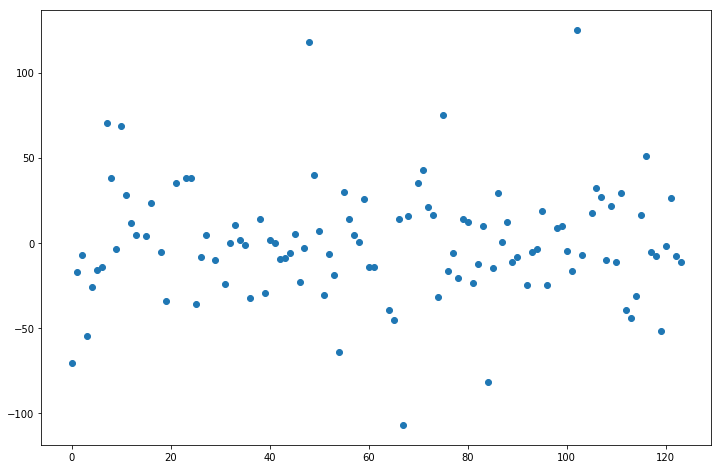

In [68]:
fit.resid.plot(style='o', figsize=(12,8));